# **INTRODUCTION**
- **Supervised Learning and Linear Regression:**

    Supervised learning is a type of algorithm where the model is trained on a labeled dataset. In this case, we are using linear regression, a popular method of supervised learning, to predict car prices based on various features.
    
    Linear regression is an approach to model the relationship between a dependent variable and one or more independent variables by finding the best linear equation that fits the data. In our case, the dependent variable is the car price and the independent variables are the car features.

- **Stochastic Gradient Descent**

    Stochastic gradient descent (SGD) is an iterative method for optimizing an objective function. In this notebook, we implement SGD with batches, a variation of SGD that uses a subset of the training data to update the model parameters. This approach is based on the SGDRegressor from sklearn and implemented using numpy.

- **Dataset**

    We will be working with a dataset provided by Geely Auto, a Chinese automotive company aspiring to enter the American market. They have collected a large dataset of different types of cars across the American market to understand the factors affecting car prices.

    We will use this data to train our model, adjusting the coefficients to minimize the error between the model’s predictions and the actual car prices. By doing this, we hope to identify which variables are significant in predicting a car’s price and how well these variables describe a car’s price.

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

Loading Dataset

In [68]:
df = pd.read_csv("data/car_price.csv")

In [88]:
# Defining All Common Functions at the top as part of code organization

# create a function to visualize the numerical columns
def histogram(column_name):
    sns.histplot(data=df[column_name], bins=50, kde=True)
    plt.title(column_name+' distribution')
    plt.xticks(rotation=90)
    plt.show()

# create a function to visualize the categrical columns
def count_plot(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot - {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

# Get Unique Values for Categorical Columns passed as a list
def unique_values(df, categorical_columns):
    for column in categorical_columns:
        print(f"Unique Values for {column} = {df[column].unique()}")
        print(f"Total Unique Values for {column} = {df[column].nunique()}")
        print()

# Clean up the column value by keeping the first word of the column value and converting it to lower case for consistency
def clean_column_value(column_name):
    return column_name.split(" ")[0].lower()

In [71]:
df.head()

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [72]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.828571,98.947143,174.354286,65.935714,53.768571,2565.909524,127.266667,3.333905,3.258286,10.224381,104.000000,5110.476190,25.180952,30.695238,13289.665081
std,1.244757,6.172319,12.457557,2.141794,2.489242,522.279331,41.297095,0.270150,0.311277,4.068746,39.114725,484.530811,6.487059,6.835908,7918.471818
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,3.150000,3.110000,8.525000,70.000000,4800.000000,19.000000,25.000000,7823.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,3.320000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10470.000000
75%,2.000000,102.400000,183.500000,66.900000,55.575000,2953.500000,145.750000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16502.250000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Evaluation**: Based on the above data, we can see the mean, standard deviation along with min, max of all the numerical values 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           210 non-null    object 
 1   carbody           210 non-null    object 
 2   drivewheel        210 non-null    object 
 3   enginelocation    210 non-null    object 
 4   fueltype          210 non-null    object 
 5   aspiration        210 non-null    object 
 6   doornumber        210 non-null    object 
 7   cylindernumber    210 non-null    object 
 8   enginetype        210 non-null    object 
 9   fuelsystem        210 non-null    object 
 10  symboling         210 non-null    int64  
 11  wheelbase         210 non-null    float64
 12  carlength         210 non-null    float64
 13  carwidth          210 non-null    float64
 14  carheight         210 non-null    float64
 15  curbweight        210 non-null    int64  
 16  enginesize        210 non-null    int64  
 1

<Axes: >

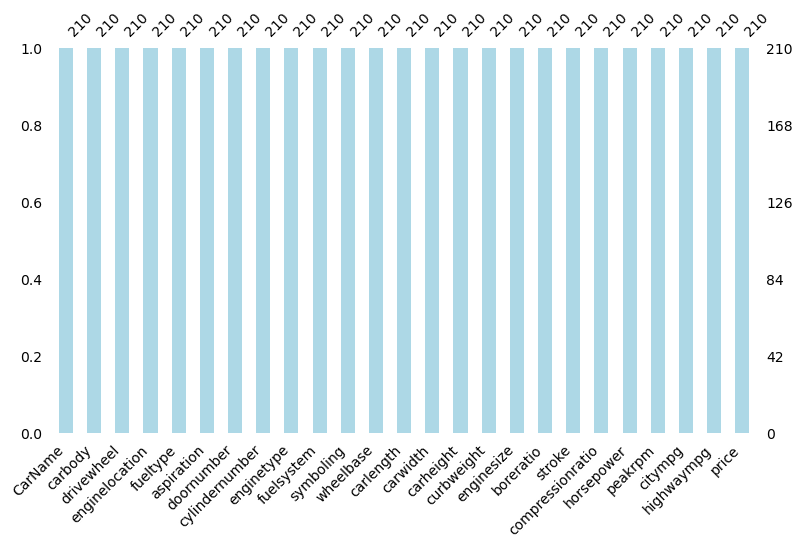

In [74]:
# Using the missingno library to visualize the missing values
fig = plt.figure(figsize=(20, 5))
msno.bar(df, color="#ADD8E6", ax=fig.add_subplot(1,2,1), fontsize=10)

In [75]:
# Creating a list of categorical columns and numerical columns
categorical_columns = df.select_dtypes(include=object).columns.tolist()
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

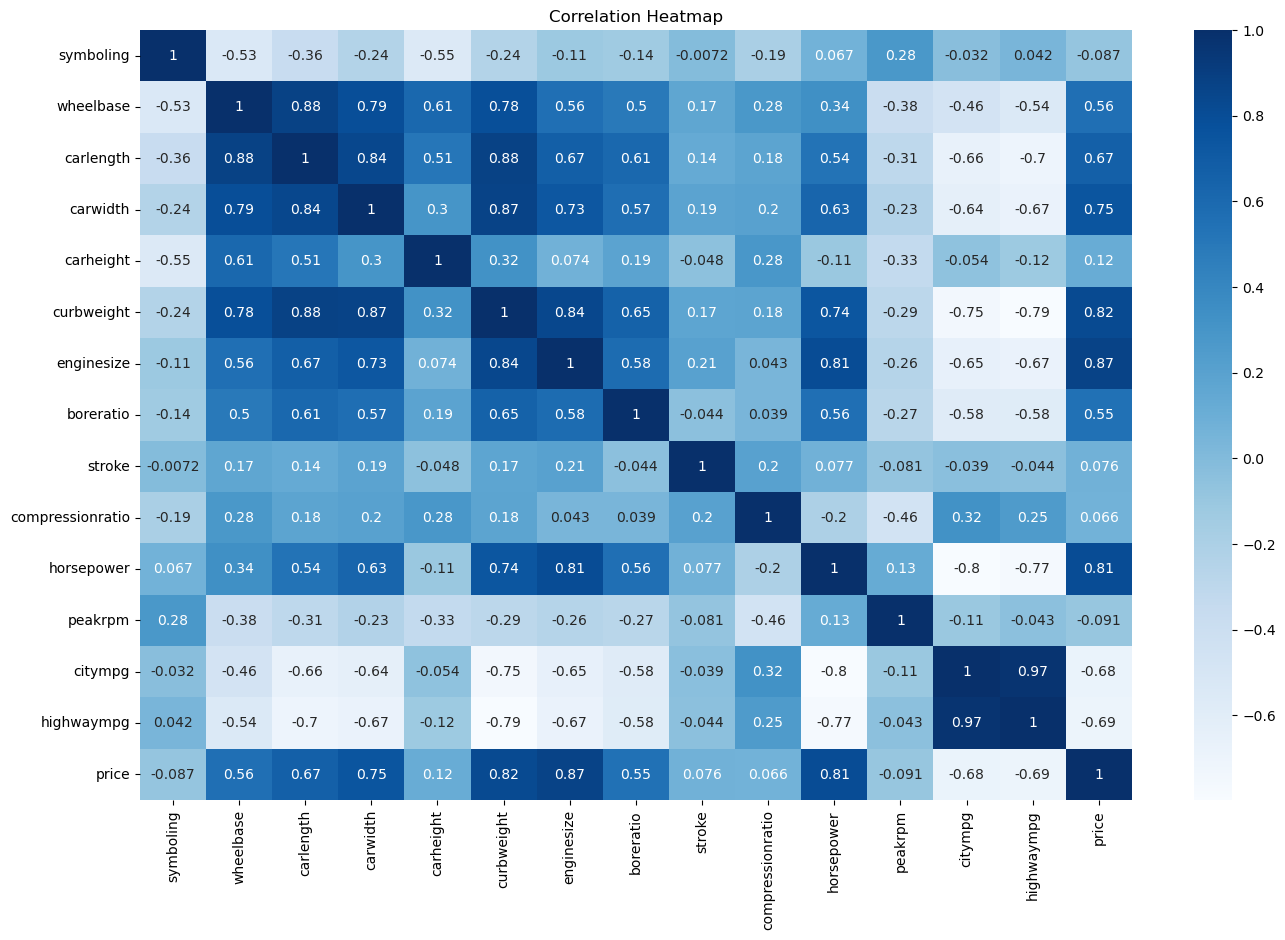

In [76]:
# By inspecting the corelation matrix, we'll be able to see which numerical columns
# have co-relation with price which is our target prediction value.
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

**Evaluation**: Based on the co-relation matrix above, we can see that engine size, horsepower, curbweight, carwidth, car length and wheelbase have a significant impact on the price. 

****Data Evaluation and Cleanup****: 
Before we further analyze the data, we'll evaluate and clean up the bad data to make sure it doesn't negatively impact our model for predicting price.

In [77]:
print("Duplicate values =",df.duplicated().sum())
print("Null values =", sum(df.isnull().sum()))

Duplicate values = 5
Null values = 0


In [78]:
# Dropping the duplicate values
df.drop_duplicates(inplace=True)
print("Duplicate values =",df.duplicated().sum())
print("Total remaining count:", df.shape[0])

Duplicate values = 0
Total remaining count: 205


In [79]:
# Evaluate Unique Values for each of the Object columns
unique_values(df, categorical_columns)

Unique Values for CarName = ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick

**Evaluation**: Based on the above values, one column can be cleaned up to keep it to the brand instead of a specific car name. For enginetype, value of 'l' seemed to be incorrect but couldn't replace it with any other specific values based on search. Keeping those records for now.

In [80]:
# Search for rows with value of enginetype as 'l'
df[df['enginetype'] == 'l']

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,chevrolet impala,hatchback,fwd,front,gas,std,two,three,l,2bbl,...,1488,61,2.91,3.03,9.5,48,5100,47,53,5151.0
107,peugeot 504,sedan,rwd,front,gas,std,four,four,l,mpfi,...,3020,120,3.46,3.19,8.4,97,5000,19,24,11900.0
108,peugeot 304,sedan,rwd,front,diesel,turbo,four,four,l,idi,...,3197,152,3.70,3.52,21.0,95,4150,28,33,13200.0
109,peugeot 504 (sw),wagon,rwd,front,gas,std,four,four,l,mpfi,...,3230,120,3.46,3.19,8.4,97,5000,19,24,12440.0
110,peugeot 504,wagon,rwd,front,diesel,turbo,four,four,l,idi,...,3430,152,3.70,3.52,21.0,95,4150,25,25,13860.0
111,peugeot 504,sedan,rwd,front,gas,std,four,four,l,mpfi,...,3075,120,3.46,2.19,8.4,95,5000,19,24,15580.0
112,peugeot 604sl,sedan,rwd,front,diesel,turbo,four,four,l,idi,...,3252,152,3.70,3.52,21.0,95,4150,28,33,16900.0
113,peugeot 504,wagon,rwd,front,gas,std,four,four,l,mpfi,...,3285,120,3.46,2.19,8.4,95,5000,19,24,16695.0
114,peugeot 505s turbo diesel,wagon,rwd,front,diesel,turbo,four,four,l,idi,...,3485,152,3.70,3.52,21.0,95,4150,25,25,17075.0
115,peugeot 504,sedan,rwd,front,gas,std,four,four,l,mpfi,...,3075,120,3.46,3.19,8.4,97,5000,19,24,16630.0


In [81]:
# Clean up car name
df['CarName'] = df['CarName'].apply(clean_column_value)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [82]:
df.head(10)

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,alfa-romero,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,alfa-romero,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,audi,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,audi,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,audi,sedan,fwd,front,gas,std,two,five,ohc,mpfi,...,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,audi,sedan,fwd,front,gas,std,four,five,ohc,mpfi,...,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,audi,wagon,fwd,front,gas,std,four,five,ohc,mpfi,...,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,audi,sedan,fwd,front,gas,turbo,four,five,ohc,mpfi,...,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,audi,hatchback,4wd,front,gas,turbo,two,five,ohc,mpfi,...,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


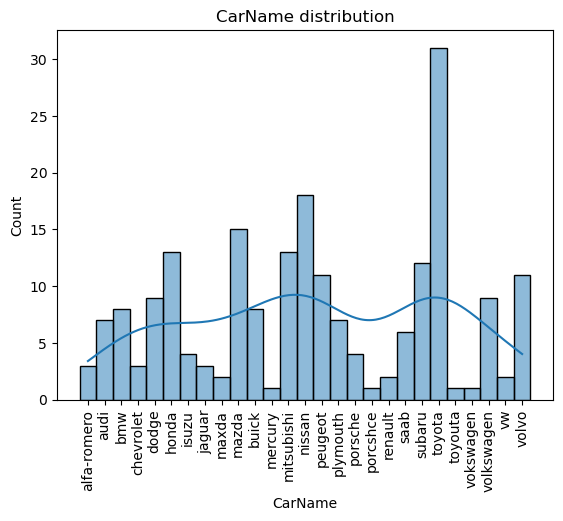

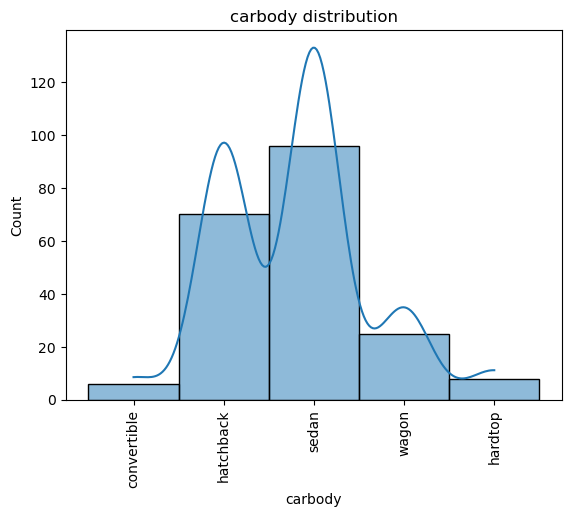

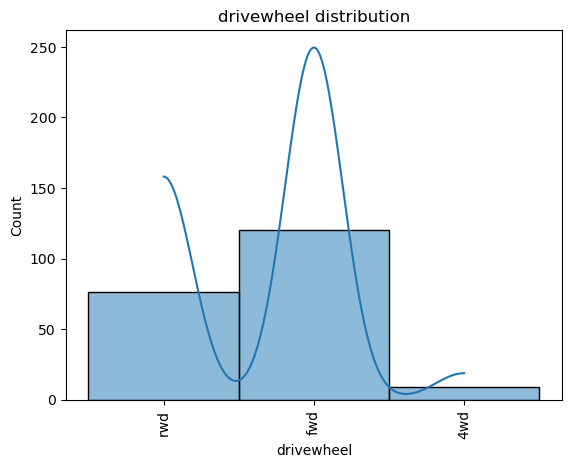

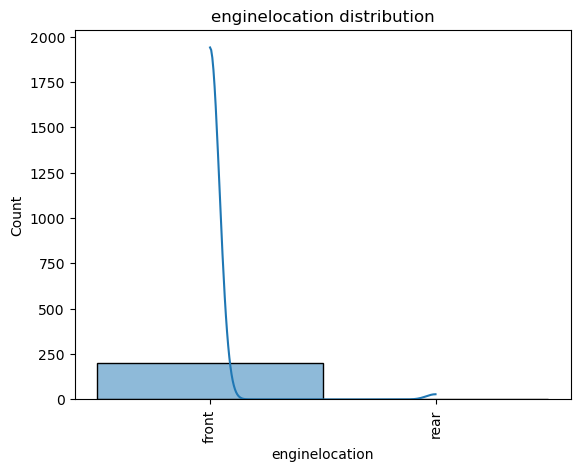

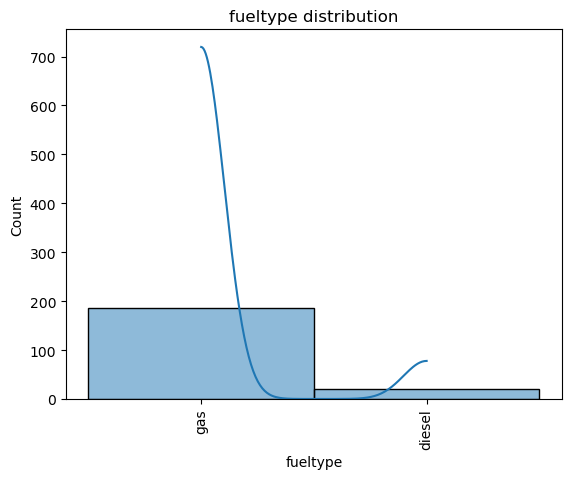

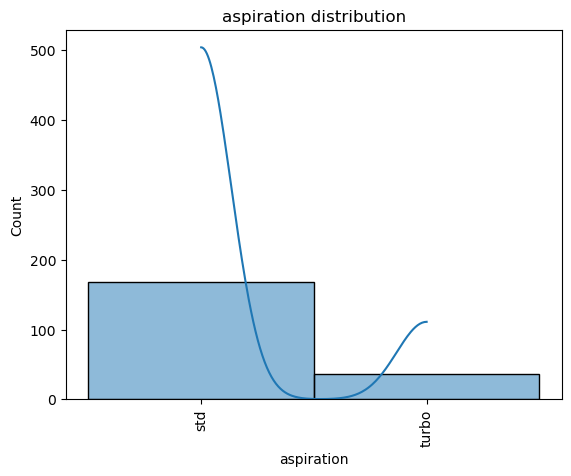

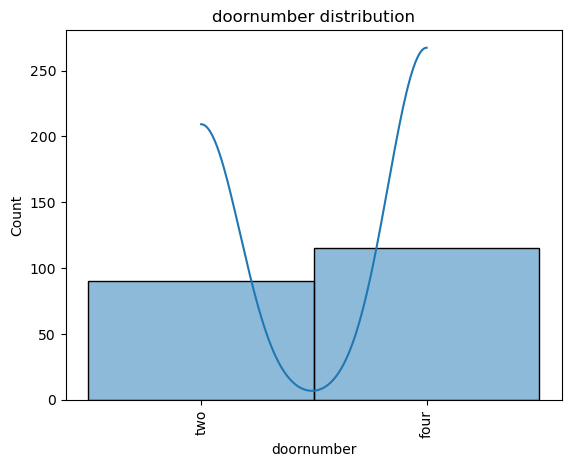

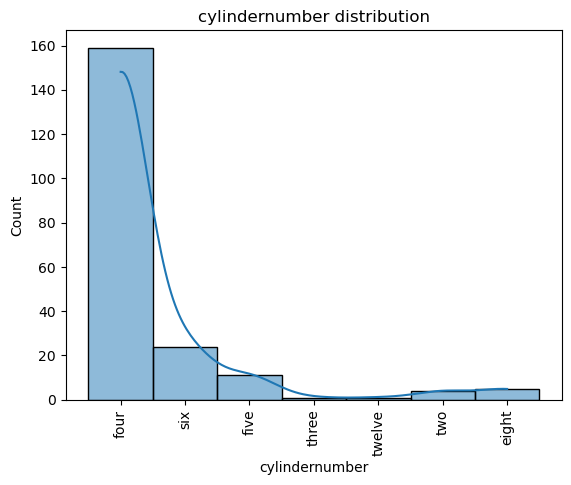

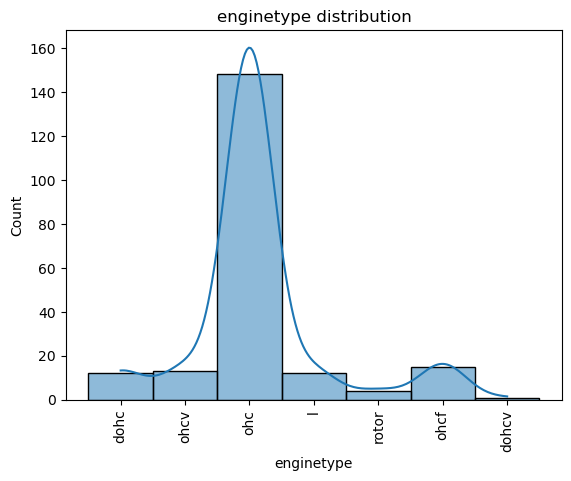

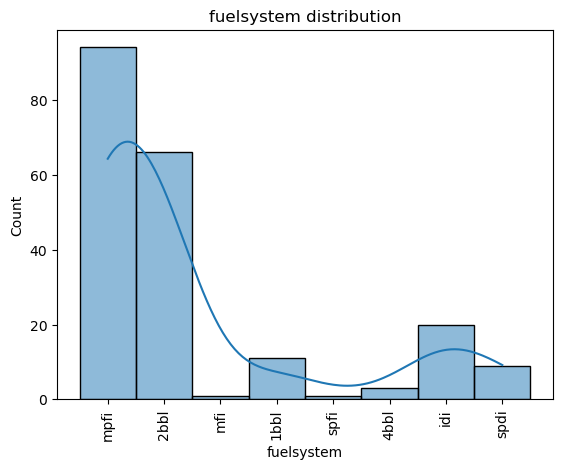

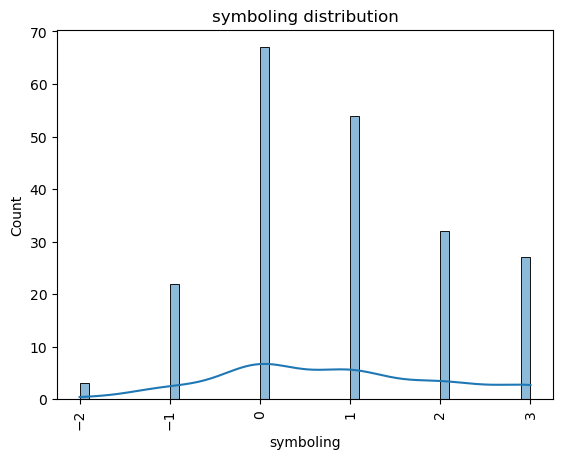

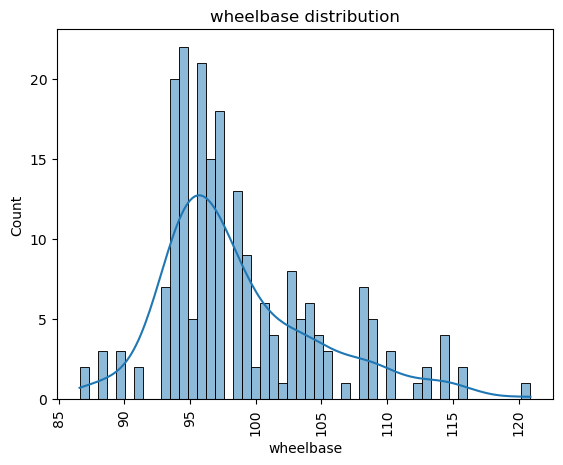

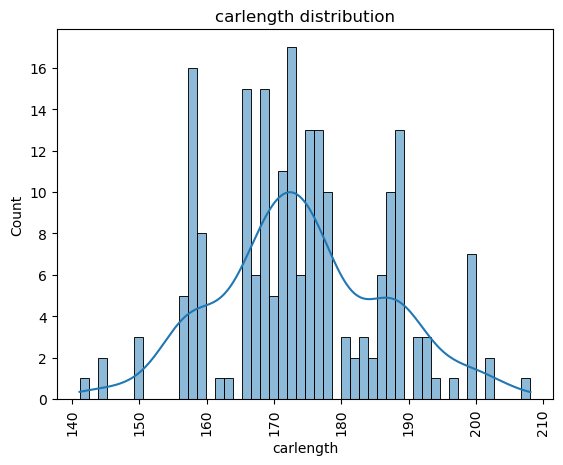

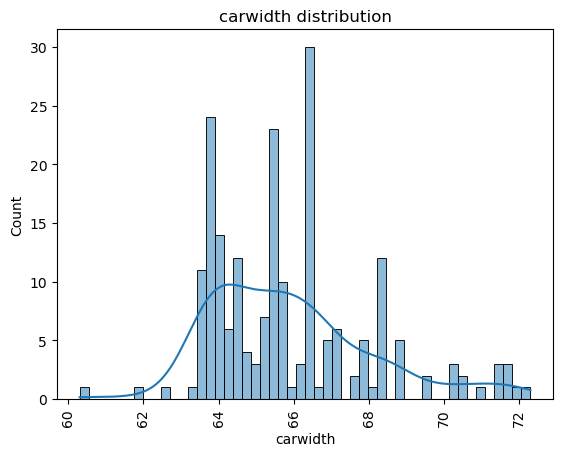

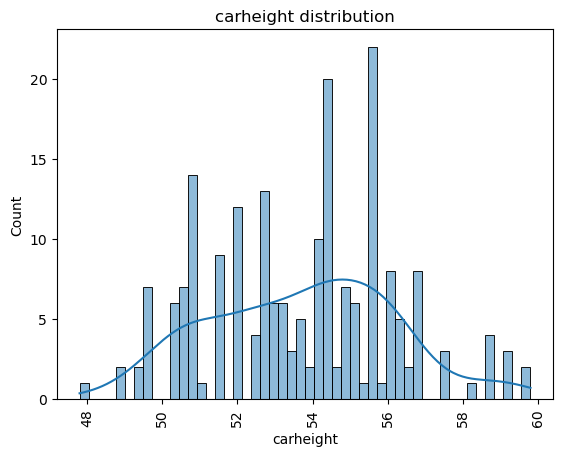

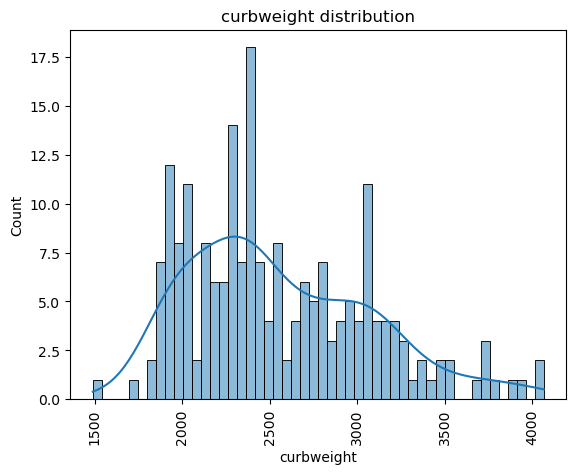

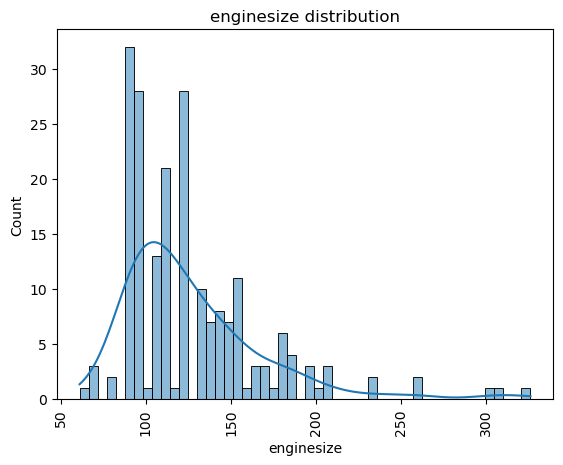

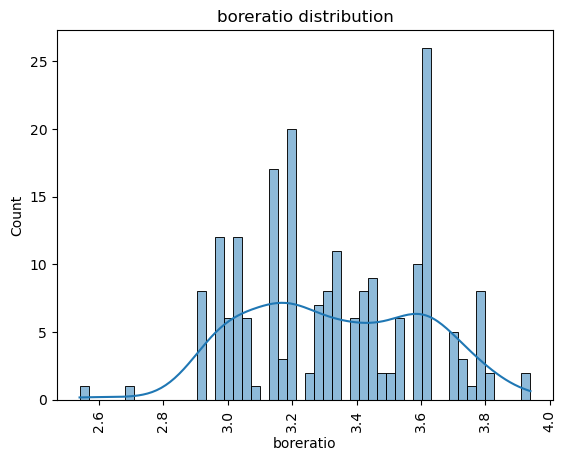

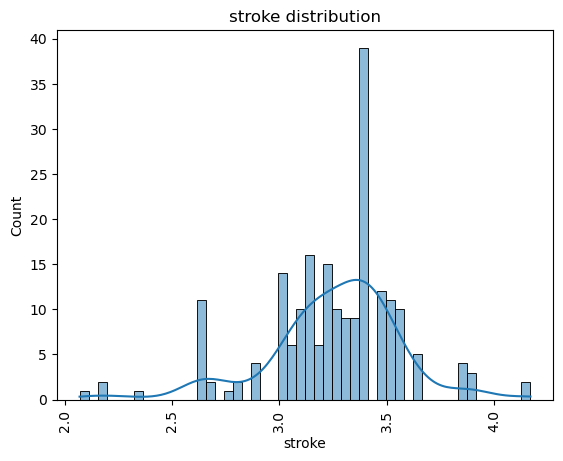

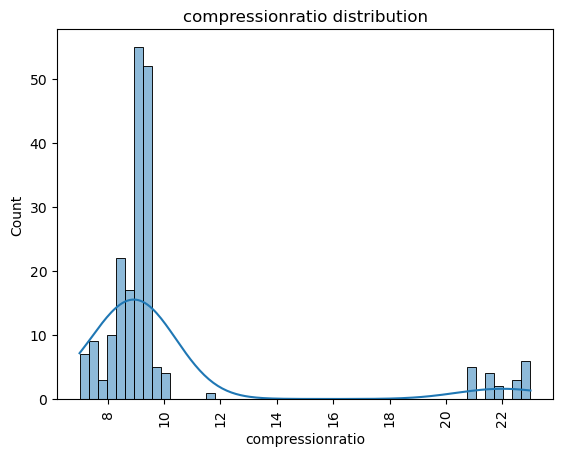

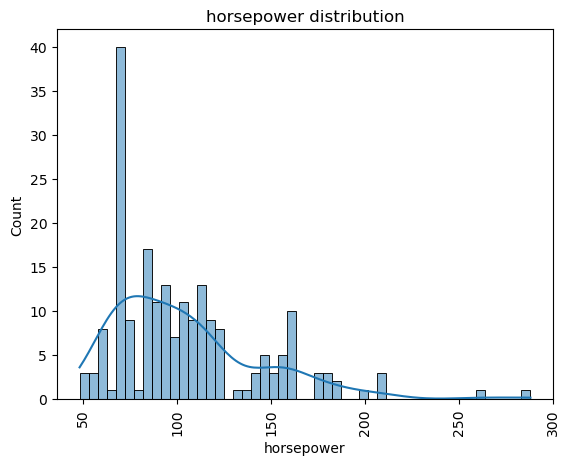

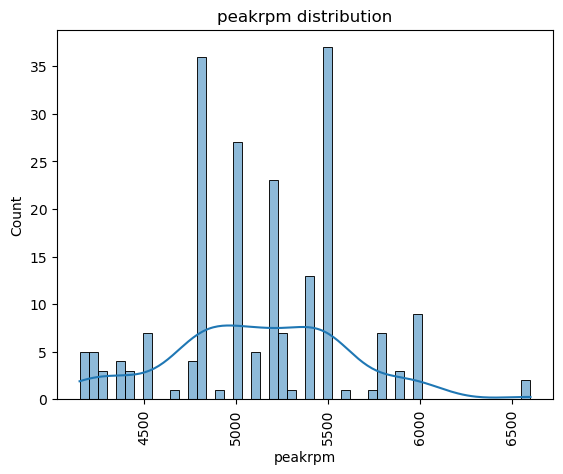

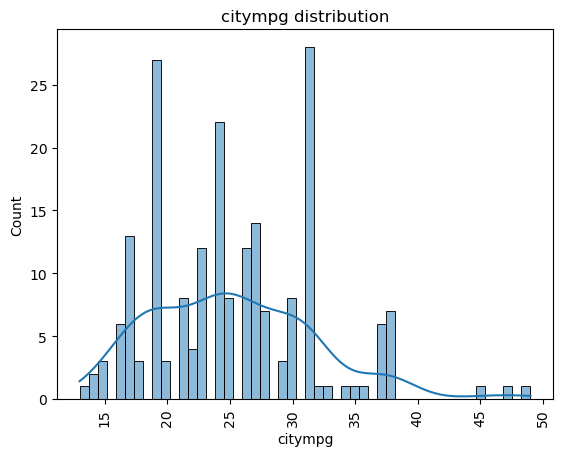

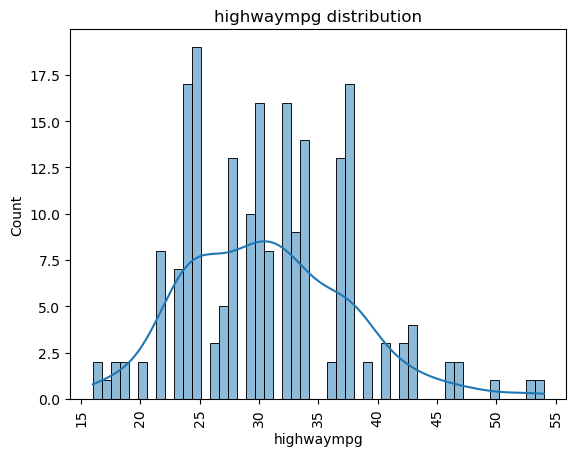

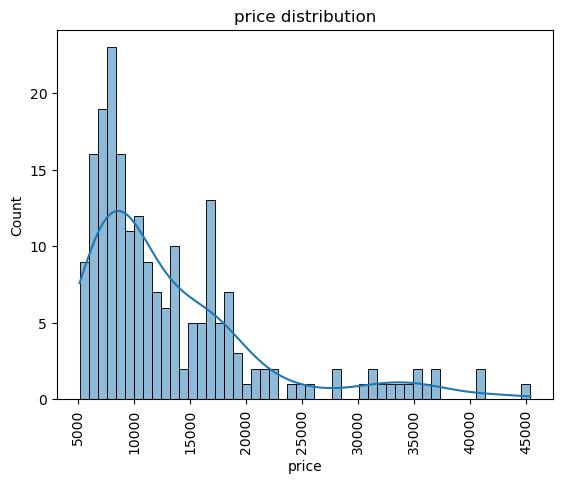

In [90]:
# Plot histograms of all columns
for column in df.columns:
    histogram(column)